In [40]:
import pandas as pd
import math


def calculate_distance(x1,y1,x2,y2):
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
     return round(dist)

results = pd.read_csv("Results/studyResults_64583.csv", encoding="utf-8")
results["TimeFromRailToTarget"] = results["Time"] - results["TimeToRail"]
results["DistanceToTarget"] = results.apply(lambda r: calculate_distance(r["TargetX"], r["TargetY"], r["StartX"], r["StartY"]), axis=1)

In [41]:
results["DistanceToTarget"]

0      5.0
1     10.0
2      5.0
3     10.0
4      5.0
5      5.0
6     10.0
7      5.0
8      5.0
9     10.0
10     5.0
11    10.0
12     5.0
13     5.0
14    10.0
15     5.0
16    10.0
17    10.0
18    10.0
19    10.0
20     5.0
21    10.0
22    10.0
23     5.0
24     5.0
25     5.0
26    10.0
27    10.0
28    10.0
29    10.0
30     5.0
31    10.0
32    10.0
33     5.0
34     5.0
35     5.0
36    10.0
37    10.0
38     5.0
39     5.0
40     5.0
41    10.0
42    10.0
43    10.0
44    10.0
45     5.0
46    10.0
47     5.0
48    10.0
49     5.0
50     5.0
51    10.0
52     5.0
53    10.0
54     5.0
55     5.0
56    10.0
57     5.0
58     5.0
59    10.0
Name: DistanceToTarget, dtype: float64

               Time
GuideLength        
0            6057.0
8            5469.6
16           3086.0
                    Time
GuideLength             
0            3082.563151
8            2561.022789
16           2650.218283


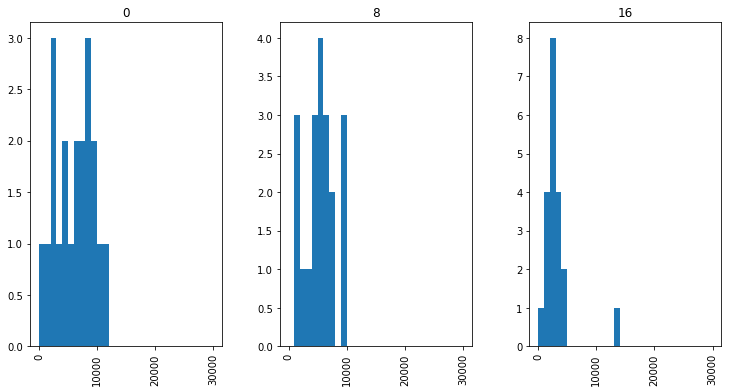

In [44]:
completion_times = results.loc[:, ["Time", "GuideLength"]]
completion_times.hist(by="GuideLength", column="Time", layout=[1,3], figsize=[12,6], sharex=True, bins=range(0,31000, 1000))
print(completion_times.groupby("GuideLength").mean())
print(completion_times.groupby("GuideLength").std())


In [9]:
results.loc[:, "Time"].mean()

4870.866666666667

In [22]:
targets_found = results.loc[:, ["FoundTarget", "GuideLength"]].groupby("GuideLength")
print(targets_found.sum()/targets_found.count())

             FoundTarget
GuideLength             
0                   0.00
8                   0.70
16                  0.95


             Easiness
GuideLength          
8            3.666667
12           4.000000
16           4.222222


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125bbd5c0>,
      dtype=object)

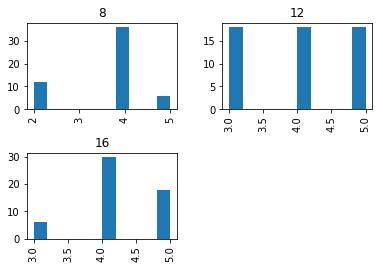

In [25]:
print(results.loc[:, ["Easiness", "GuideLength"]].groupby("GuideLength").mean())
results.hist(by="GuideLength", column="Easiness")

             Agency
GuideLength        
0              5.00
8              4.25
16             3.50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d14610>,
      dtype=object)

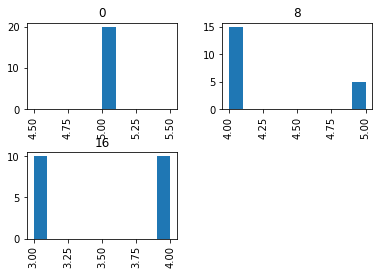

In [24]:
print(results.loc[:, ["Agency", "GuideLength"]].groupby("GuideLength").mean())
results.hist(by="GuideLength", column="Agency")

             TimeToRail
GuideLength            
0                  -1.0
8                3298.7
16                831.3
              TimeToRail
GuideLength             
0               0.000000
8            2609.607615
16            419.980714


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112110450>,
      dtype=object)

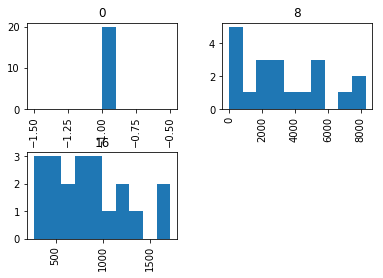

In [26]:
print(results.loc[:, ["TimeToRail", "GuideLength"]].groupby("GuideLength").mean())
print(results.loc[:, ["TimeToRail", "GuideLength"]].groupby("GuideLength").std())
results.hist(by="GuideLength", column="TimeToRail")
#results.loc[results["GuideLength"]==8, ["TimeToRail"]]

             TimeFromRailToTarget
GuideLength                      
0                          6058.0
8                          2170.9
16                         2254.7
             TimeFromRailToTarget
GuideLength                      
0                     3082.563151
8                     1795.772137
16                    2696.269764


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1122c70d0>,
      dtype=object)

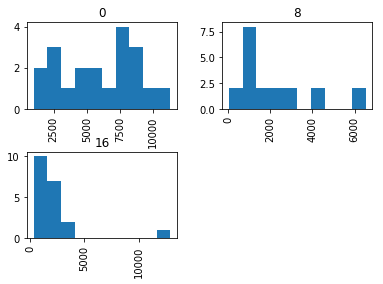

In [27]:
print(results.loc[:, ["TimeFromRailToTarget", "GuideLength"]].groupby("GuideLength").mean())
print(results.loc[:, ["TimeFromRailToTarget", "GuideLength"]].groupby("GuideLength").std())
results.hist(by="GuideLength", column="TimeFromRailToTarget")

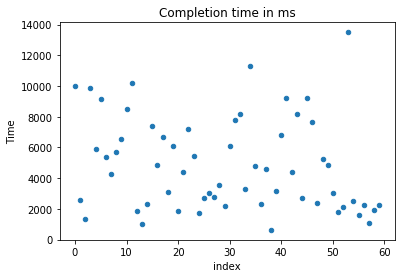

In [28]:
results.reset_index().plot(x="index", y="Time", kind="scatter", title="Completion time in ms")
# TODO: generate pictures of start & target positions for longer trials

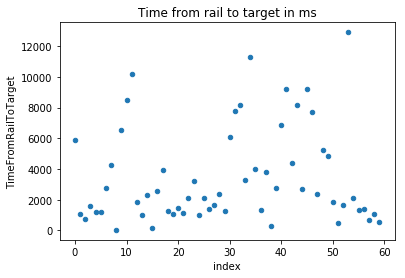

In [29]:
results.reset_index().plot(kind="scatter", x="index", y="TimeFromRailToTarget", title="Time from rail to target in ms")

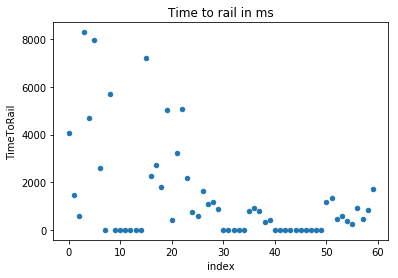

In [30]:
results.reset_index().plot(x="index", y="TimeToRail", kind="scatter", title="Time to rail in ms")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1125dee10>,
      dtype=object)

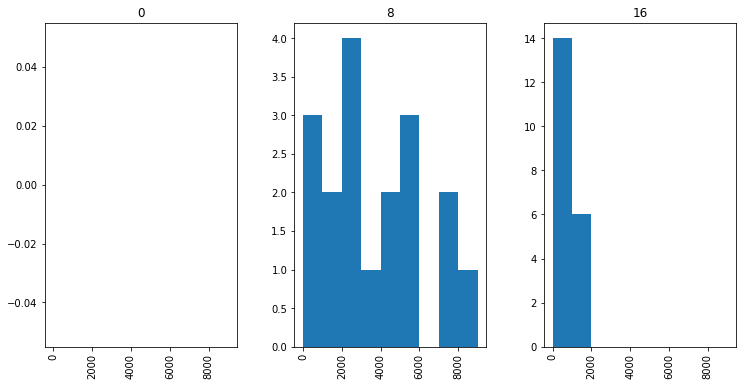

In [31]:
results.hist(by="GuideLength", column="TimeToRail", layout=[1,3], figsize=[12,6], sharex=True, bins=range(0,10000, 1000))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112764bd0>,
      dtype=object)

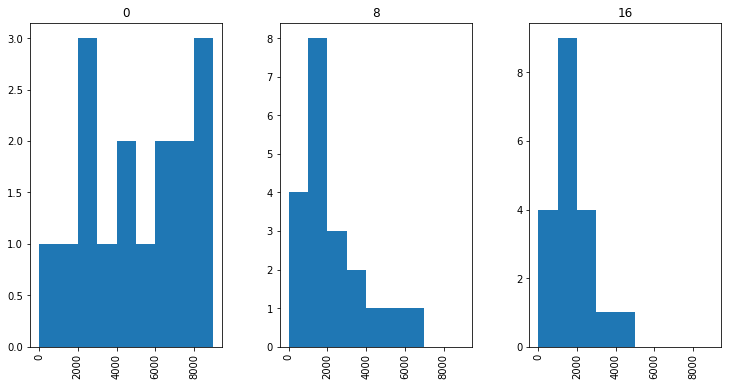

In [32]:
results.hist(by="GuideLength", column="TimeFromRailToTarget", layout=[1,3], figsize=[12,6], sharex=True, bins=range(0,10000, 1000))

                         Time
DistanceToTarget             
5.0               4384.700000
10.0              5357.033333
                         Time
DistanceToTarget             
5.0               3025.492826
10.0              2982.685049


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112b10d10>,
      dtype=object)

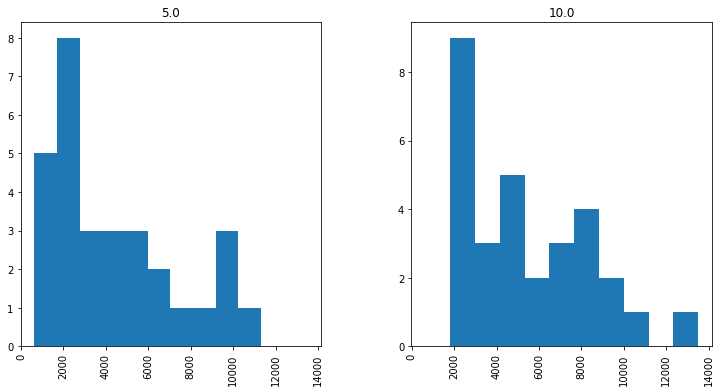

In [43]:
print(results.loc[:, ["Time", "DistanceToTarget"]].groupby("DistanceToTarget").mean())
print(results.loc[:, ["Time", "DistanceToTarget"]].groupby("DistanceToTarget").std())
results.hist(by="DistanceToTarget", column="Time", layout=[1,2], figsize=[12,6], sharex=True)